In [1]:
using GynC, Plots, Distributions

In [ ]:
reload("GynC")

In [127]:
n = 100
mass = 70
mass = 6
tmeas = [1]
measerr = Normal(0,1.5)
ndata = 50
augz = 300
reg = 15/16
augd = 50
smoothsigma = 6

xs = linspace(1,50,n) |> collect

phi(k) = GynC.Federn.odesol(k, tmeas, m=mass)[1]
plot(xs, phi.(xs))

w0 = ones(length(xs)) / length(xs);
prior = GynC.Federn.prior
wprior = pdf(prior, xs)
wprior = wprior / sum(wprior);

srand(3)
m = GynC.syntheticmodel(xs, phi, prior, ndata, augz, measerr)
@show KernelDensity.default_bandwidth(m.datas)
ms = GynC.smoothedmodel(m, 100, m.measerr, sigma=smoothsigma);

KernelDensity.default_bandwidth(m.datas) = 1.4525152051557095


In [158]:
h = 0.1
niter = 1000

wsgrad = Dict()
@time begin
  wsgrad["NPMLE"] = GynC.em(m, w0, niter)
  wsgrad["DS-MLE"] = GynC.em(ms, w0, niter);
  wsgrad["MPLE"]  = GynC.mple(m, w0, niter, reg, h)
  wsgrad["Reference Prior"] = GynC.mple(m, w0, niter, 1, h);
end

ws = wsgrad

GynC.mple_obj(m, 0)(ws["NPMLE"][end]) |> println
GynC.mple_obj(ms, 0)(ws["DS-MLE"][end]) |> println
GynC.mple_obj(m, reg)(ws["MPLE"][end]) |> println
GynC.mple_obj(m, 1)(ws["Reference Prior"][end]) |> println

labels = ["NPMLE" "DS-MLE" "MPLE" "Reference Prior"]
densities = map(l->ws[l][end], labels) |> vec

plot(xs, wprior, label="True Prior", legendfont=font(10), tickfont=font(8), ylims=(0,0.05), size=(600, 350), grid=false)
plot!(xs, densities, labels=labels)

LoadError: InterruptException:

# Plots

In [159]:
kdenpoints = 200
trajts = 0:1/20:5
sols = [GynC.Federn.odesol(k,trajts, m=mass) for k = xs]
#meas = [-9.3]
meas = [phi(21.5)]
trajalpha = 10
priorcolor = :dodgerblue
postcolor  = :orangered
alphalim = 0.001

function bayesposterior(m, data, wprior)
    L = likelihoodmat(m.ys, data, m.measerr)
    GynC.emiteration(wprior, L)
end

function plottrajs(ts, sols, w; alpha=trajalpha, kwargs...)
    as = min.(1., w*alpha)
    i = find(x->x>=alphalim, as)
    plot(ts, sols[i], alpha = as[i]', legend=false, color=:black; kwargs...)
end


function plotcol(w)
    
    yscale = length(xs) / maximum(xs)
    ylims = (0,.20)
    
    pprior = plot(xs, w*yscale, legend=false, color=priorcolor, ylims=ylims)
    
    wpost = bayesposterior(m, meas, w)
    plot!(xs, wpost*yscale, color=postcolor)
    
    
    pprioq = plottrajs(trajts, sols, w)
    scatter!(pprioq, repmat(tmeas, length(m.datas)), m.datas, alpha = 1, ms = 1, marker=:cross,  markerstrokecolor=priorcolor)
    
    #ppostq = plottrajdens(trajts, sols, wpost)
    ppostq = plottrajs(trajts, sols, wpost)
    scatter!(ppostq, tmeas, meas, marker = (:hline, 20, 0.9, postcolor))
    scatter!(ppostq, tmeas, meas, marker = (:vline, 20, 0.9, postcolor)) 
    [pprior, pprioq, ppostq]
end

#plot(plotcol(ws["NPMLE"])..., size=(1000,400), layout=(1,3))

plotcol (generic function with 1 method)

In [160]:
ws = wsgrad

pyplot(fmt=:png, grid=false)
aplots = hcat(plotcol(wprior), plotcol(w0), plotcol(ws["NPMLE"][end]), plotcol(ws["DS-MLE"][end]), plotcol(ws["MPLE"][end]))
plot(aplots..., size=(1200,900), layout=(5,3))

LoadError: InterruptException:

In [143]:
ws["NPMLE"][end]|>hist

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in sturges(::Int64) at ./deprecated.jl:624
 in hist at ./deprecated.jl:647 [inlined]
 in |>(::Array{Float64,1}, ::Base.#hist) at ./operators.jl:350
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/numerik/bzfsikor/.julia/v0.5/IJulia/src/execute_request.jl:156
 in eventloop(::ZMQ.Socket) at /home/numerik/bzfsikor/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading In[143], in expression starting on line 1
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in histrange(::Array{Float64,1}, ::Int64) at ./deprecated.jl:552
 in hist at ./deprecated.jl:646 [inlined]
 in hist at ./deprecated.jl:647 [inlined]
 in |>(::Array{Float64,1}, ::Base.#hist) at ./operators.jl:350
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/numerik/bzfsikor/.julia/v0.5/IJulia/src/execu

(-0.05:0.05:0.30000000000000004,[16,79,2,1,1,0,1])

In [147]:
for i in (ws["NPMLE"][end]|>sort)
  println(i)
  end

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.334795362e-314
3.36075185126501e-245
5.494355344779889e-188
6.316692650380645e-141
9.93351316937835e-103
2.921984600093378e-72
1.586874769389493e-48
1.2138405337400688e-30
5.256231772172495e-23
6.914034162837094e-23
8.167794673551666e-23
1.761495873572835e-22
2.6800750711794967e-22
8.10150614192178e-22
1.8694790629070566e-21
6.196772785464196e-21
2.7098157983407505e-20
7.212993930534881e-20
7.727020862951584e-19
1.1657847473931355e-18
8.45487349265996e-18
2.3894484294038128e-17
3.969990829249597e-17
5.694757007659282e-16
3.2590581257549072e-15
1.4560352498203142e-14
4.2951069294438666e-14
6.058550406682361e-14
1.071596406574404e-13
2.9810127308454423e-13
3.6802981859763236e-13
3.71388502546578e-13
8.460480477969681e-13
4.492871576924041e-12
8.866888343611246e-12
1.7239037755239212e-11
4.8008665182692715e-11
1.6259485019837562e-10
1.8769677099156848e-10
6.879571487796934e-10
3.2186061462125847e-9
3.369243338771855e-9
5.96


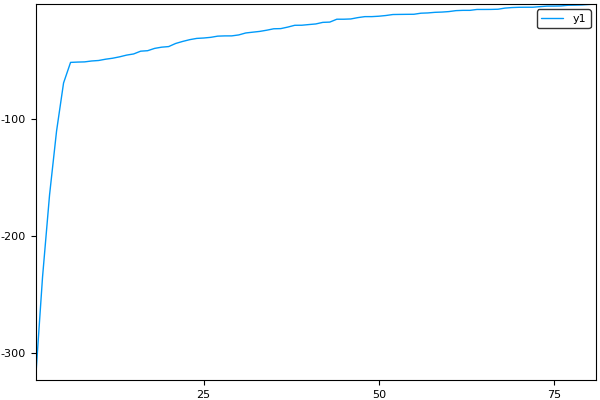

In [157]:

plot(sort(log(ws["NPMLE"][end]))[20:end])

In [ ]:
savefig("paper federn.pdf")

In [44]:
r(x) = GynC.Federn.maxtreatamplitude(x) > 13 ? 1 : 0

rxs = r.(xs)

R(w, data) = dot(bayesposterior(m, [data], w), rxs)

sRa(w) = sqrt(1/(length(m.datas)-1) * sumabs2((R(w, data) - R(wprior, data)) for data in m.datas))

map(sRa, [wprior, w0, ws["NPMLE"][end], ws["DS-MLE"][end], ws["MPLE"][end]])

5-element Array{Float64,1}:
 0.0      
 0.221964 
 0.188082 
 0.158182 
 0.0496536